In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
folder = '1pct Cosine Context'
file_to_read = 'summary_foxnews_cnn.csv'

df = pd.read_csv(folder + r'/' + file_to_read , index_col=0, usecols=[1, 2, 3, 4])

In [2]:
def side_by_side(*objs, **kwds):
    ''' Une fonction print objects side by side '''
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print(adjoin(space, *reprs))

df = df.dropna()
a = .5
df['c_adj'] = df['controversy'] / df['controversy'].max()
df['js_adj'] = df['tfidf'] / df['tfidf'].max()
df['ms_adj'] = df['logodds'] / df['logodds'].max()

# controversy times joint significance (tfidf)
df['c x js'] = (df['controversy'] ** a) * (df['js_adj'] ** a)
# controversy times marginal significance (logodds)
df['c x ms'] = (df['controversy'] ** a) * (df['ms_adj'] ** a)

df = df.round(2)

print(len(df))

pd.options.display.max_rows = 100

dfa = df.sort_values(by='controversy', ascending=False)
dfb = df.sort_values(by='js_adj', ascending=False)
dfc = df.sort_values(by='ms_adj', ascending=False)
print(dfa[['controversy']].head(10))

df1 = df.sort_values(by='c x js', ascending=False)
print(df1[['c x js']].head(10))
df2 = df.sort_values(by='c x ms', ascending=False)
print(df2[['c x ms']].head(10))
# side_by_side(df1[['c x js']].head(100),df2[['c x ms']].head(100))


433
             controversy
term                    
continued           0.51
flash               0.47
ap                  0.43
fox                 0.42
coverage            0.41
according           0.39
cnn                 0.37
top                 0.36
hundred_and         0.36
times               0.34
             c x js
term               
fox            0.49
news           0.47
outbreak       0.43
and            0.42
coronavirus    0.41
coverage       0.39
click          0.39
one            0.37
said           0.36
get            0.35
             c x ms
term               
flash          0.67
ap             0.61
fox            0.56
inbox          0.52
coverage       0.46
lifestyle      0.45
click          0.44
contributed    0.44
cnn            0.44
percent        0.42


Text(0.5, 0, 'tfidf')

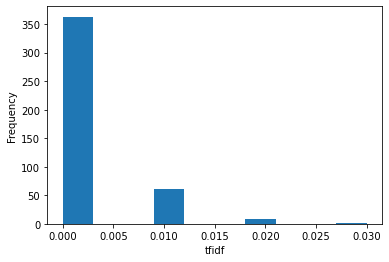

In [3]:
df['tfidf'].plot(x='tfidf', kind='hist')
plt.xlabel('tfidf')

Text(0.5, 0, 'Normalized joint significance')

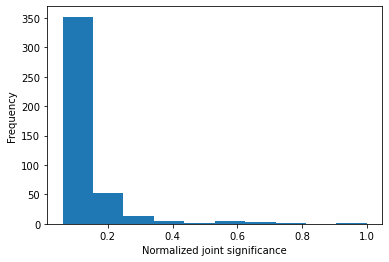

In [4]:
df['js_adj'].plot(x='js_adj', kind='hist')
plt.xlabel('Normalized joint significance')

Text(0.5, 0, 'Normalized marginal significance')

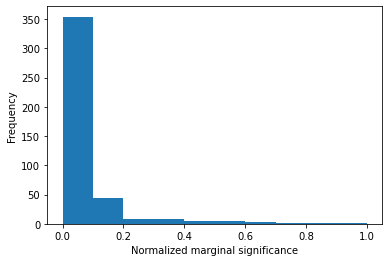

In [5]:
df['ms_adj'].plot(x='ms_adj', kind='hist')
plt.xlabel('Normalized marginal significance')

Text(0, 0.5, 'Normalized joint significance')

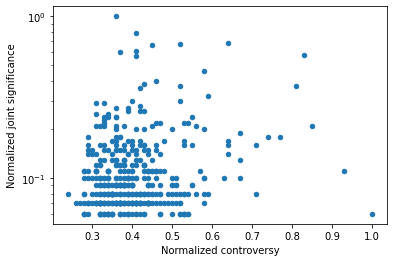

In [6]:
# df['controversy_adj'] = np.log(df['controversy_adj'])
df.plot(x='c_adj', y='js_adj', logy=True, kind='scatter')
plt.xlabel('Normalized controversy')
plt.ylabel('Normalized joint significance')

Text(0, 0.5, 'Normalized marginal significance')

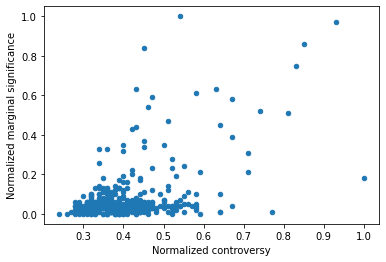

In [7]:
# df['controversy_adj'] = np.log(df['controversy_adj'])
df.plot(x='c_adj', y='ms_adj', kind='scatter')
plt.xlabel('Normalized controversy')
plt.ylabel('Normalized marginal significance')